## Power generation Forecasting
by Hoang cute

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

2022-11-30 14:49:50.205938: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-30 14:49:50.369039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 14:49:50.369080: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2022-11-30 14:49:55.480850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 14:49:55.495140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-30 14:49:55.495663: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 14:49:55.495764: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (forecast): /proc/driver/nvidia/version does not exist


In [3]:
# Read the datasets
import glob
path = r'/home/wicomai/Downloads/AI_ver_02/weather-283' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,encoding = 'unicode_escape')
    df = df.rename(columns={'ÁöÁ¡':'Point','ÀÏ½Ã':'datetime','±â¿Â(¡ÆC)':'Temperature (°C)','´©Àû°­¼ö·®(mm)':'Precipitation (mm)','Ç³Çâ(deg)':'Wind Direction (deg)'
    ,'Ç³¼Ó(m/s)':'Wind Speed (m/s)','ÇöÁö±â¾Ð(hPa)':'Barometric Pressure (hPa)','ÇØ¸é±â¾Ð(hPa)':'Sea Level Pressure (hPa)','½Àµµ(%)':'Humidity (%)',
    'ÀÏ»ç(MJ/m2)':'Insolation (MJ/m^2)','ÀÏÁ¶(hr)':'Sunlight (hr)'})
    df['datetime'] = pd.to_datetime(df['datetime'])
    li.append(df)

df_weather = pd.concat(li, axis=0, ignore_index=True)
df_weather = df_weather.drop_duplicates(keep=False)
df_weather = df_weather.drop(['Point'],axis=1).set_index('datetime')
df_weather.head()

,Temperature (°C),°­¼ö·®(mm),Wind Speed (m/s),Ç³Çâ(16¹æÀ§),Humidity (%),Áõ±â¾Ð(hPa),ÀÌ½½Á¡¿Âµµ(¡ÆC),Barometric Pressure (hPa),Sea Level Pressure (hPa),Sunlight (hr),...,¿îÇü(¿îÇü¾à¾î),ÃÖÀú¿î°í(100m ),½ÃÁ¤(10m),Áö¸é»óÅÂ(Áö¸é»óÅÂÄÚµå),Çö»ó¹øÈ£(±¹³»½Ä),Áö¸é¿Âµµ(¡ÆC),5cm ÁöÁß¿Âµµ(¡ÆC),10cm ÁöÁß¿Âµµ(¡ÆC),20cm ÁöÁß¿Âµµ(¡ÆC),30cm ÁöÁß¿Âµµ(¡ÆC)
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,-4.2,NaN,4.1,320.0,60.0,2.7,-10.8,1020.5,1025.7,NaN,...,NaN,NaN,3119.0,NaN,NaN,-5.1,-1.6,-0.8,1.0,2.7
2021-01-01 01:00:00,-4.5,NaN,4.8,320.0,56.0,2.5,-11.9,1020.9,1026.1,NaN,...,NaN,NaN,3053.0,NaN,NaN,-5.6,-1.9,-1.0,1.0,2.7
2021-01-01 02:00:00,-5.2,NaN,3.0,340.0,60.0,2.5,-11.7,1020.8,1026.0,NaN,...,NaN,NaN,3116.0,NaN,NaN,-6.3,-2.2,-1.2,1.0,2.7
2021-01-01 03:00:00,-5.2,NaN,4.3,340.0,60.0,2.5,-11.7,1021.1,1026.3,NaN,...,NaN,NaN,3068.0,NaN,NaN,-6.5,-2.5,-1.3,0.9,2.7
2021-01-01 04:00:00,-4.9,NaN,3.9,340.0,60.0,2.6,-11.4,1021.5,1026.7,NaN,...,NaN,NaN,3120.0,NaN,NaN,-6.6,-2.7,-1.4,0.9,2.6


In [4]:
print(len(df_weather))

43807


In [5]:
df_weather.head()

,Temperature (°C),°­¼ö·®(mm),Wind Speed (m/s),Ç³Çâ(16¹æÀ§),Humidity (%),Áõ±â¾Ð(hPa),ÀÌ½½Á¡¿Âµµ(¡ÆC),Barometric Pressure (hPa),Sea Level Pressure (hPa),Sunlight (hr),...,¿îÇü(¿îÇü¾à¾î),ÃÖÀú¿î°í(100m ),½ÃÁ¤(10m),Áö¸é»óÅÂ(Áö¸é»óÅÂÄÚµå),Çö»ó¹øÈ£(±¹³»½Ä),Áö¸é¿Âµµ(¡ÆC),5cm ÁöÁß¿Âµµ(¡ÆC),10cm ÁöÁß¿Âµµ(¡ÆC),20cm ÁöÁß¿Âµµ(¡ÆC),30cm ÁöÁß¿Âµµ(¡ÆC)
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,-4.2,NaN,4.1,320.0,60.0,2.7,-10.8,1020.5,1025.7,NaN,...,NaN,NaN,3119.0,NaN,NaN,-5.1,-1.6,-0.8,1.0,2.7
2021-01-01 01:00:00,-4.5,NaN,4.8,320.0,56.0,2.5,-11.9,1020.9,1026.1,NaN,...,NaN,NaN,3053.0,NaN,NaN,-5.6,-1.9,-1.0,1.0,2.7
2021-01-01 02:00:00,-5.2,NaN,3.0,340.0,60.0,2.5,-11.7,1020.8,1026.0,NaN,...,NaN,NaN,3116.0,NaN,NaN,-6.3,-2.2,-1.2,1.0,2.7
2021-01-01 03:00:00,-5.2,NaN,4.3,340.0,60.0,2.5,-11.7,1021.1,1026.3,NaN,...,NaN,NaN,3068.0,NaN,NaN,-6.5,-2.5,-1.3,0.9,2.7
2021-01-01 04:00:00,-4.9,NaN,3.9,340.0,60.0,2.6,-11.4,1021.5,1026.7,NaN,...,NaN,NaN,3120.0,NaN,NaN,-6.6,-2.7,-1.4,0.9,2.6


In [6]:
df_weather.to_csv('Gyeongjusi_hourly.csv')

In [7]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [8]:
df_final = df_convert_dtypes(df_weather, np.object, np.float64)
df_final.head(30)

/tmp/ipykernel_63310/669393798.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_final = df_convert_dtypes(df_weather, np.object, np.float64)


,Temperature (°C),°­¼ö·®(mm),Wind Speed (m/s),Ç³Çâ(16¹æÀ§),Humidity (%),Áõ±â¾Ð(hPa),ÀÌ½½Á¡¿Âµµ(¡ÆC),Barometric Pressure (hPa),Sea Level Pressure (hPa),Sunlight (hr),...,¿îÇü(¿îÇü¾à¾î),ÃÖÀú¿î°í(100m ),½ÃÁ¤(10m),Áö¸é»óÅÂ(Áö¸é»óÅÂÄÚµå),Çö»ó¹øÈ£(±¹³»½Ä),Áö¸é¿Âµµ(¡ÆC),5cm ÁöÁß¿Âµµ(¡ÆC),10cm ÁöÁß¿Âµµ(¡ÆC),20cm ÁöÁß¿Âµµ(¡ÆC),30cm ÁöÁß¿Âµµ(¡ÆC)
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,-4.2,NaN,4.1,320.0,60.0,2.7,-10.8,1020.5,1025.7,NaN,...,NaN,NaN,3119.0,NaN,NaN,-5.1,-1.6,-0.8,1.0,2.7
2021-01-01 01:00:00,-4.5,NaN,4.8,320.0,56.0,2.5,-11.9,1020.9,1026.1,NaN,...,NaN,NaN,3053.0,NaN,NaN,-5.6,-1.9,-1.0,1.0,2.7
2021-01-01 02:00:00,-5.2,NaN,3.0,340.0,60.0,2.5,-11.7,1020.8,1026.0,NaN,...,NaN,NaN,3116.0,NaN,NaN,-6.3,-2.2,-1.2,1.0,2.7
2021-01-01 03:00:00,-5.2,NaN,4.3,340.0,60.0,2.5,-11.7,1021.1,1026.3,NaN,...,NaN,NaN,3068.0,NaN,NaN,-6.5,-2.5,-1.3,0.9,2.7
2021-01-01 04:00:00,-4.9,NaN,3.9,340.0,60.0,2.6,-11.4,1021.5,1026.7,NaN,...,NaN,NaN,3120.0,NaN,NaN,-6.6,-2.7,-1.4,0.9,2.6
2021-01-01 05:00:00,-4.9,NaN,5.2,340.0,59.0,2.5,-11.6,1021.3,1026.5,NaN,...,NaN,NaN,3238.0,NaN,NaN,-6.5,-2.9,-1.5,0.9,2.6
2021-01-01 06:00:00,-4.8,NaN,5.2,340.0,55.0,2.4,-12.4,1021.7,1026.9,NaN,...,NaN,NaN,3282.0,NaN,NaN,-6.5,-2.9,-1.6,0.8,2.6
2021-01-01 07:00:00,-8.1,NaN,2.6,180.0,74.0,2.5,-11.9,1021.9,1027.2,NaN,...,NaN,NaN,2327.0,NaN,NaN,-7.7,-3.2,-1.7,0.7,2.5
2021-01-01 08:00:00,-9.0,NaN,2.5,180.0,80.0,2.5,-11.8,1022.4,1027.7,0.0,...,NaN,NaN,2022.0,NaN,NaN,-8.0,-3.6,-2.0,0.6,2.5


In [9]:
print(len(df_final))

43807


In [10]:
df_final.describe()

,Temperature (°C),°­¼ö·®(mm),Wind Speed (m/s),Ç³Çâ(16¹æÀ§),Humidity (%),Áõ±â¾Ð(hPa),ÀÌ½½Á¡¿Âµµ(¡ÆC),Barometric Pressure (hPa),Sea Level Pressure (hPa),Sunlight (hr),...,¿îÇü(¿îÇü¾à¾î),ÃÖÀú¿î°í(100m ),½ÃÁ¤(10m),Áö¸é»óÅÂ(Áö¸é»óÅÂÄÚµå),Çö»ó¹øÈ£(±¹³»½Ä),Áö¸é¿Âµµ(¡ÆC),5cm ÁöÁß¿Âµµ(¡ÆC),10cm ÁöÁß¿Âµµ(¡ÆC),20cm ÁöÁß¿Âµµ(¡ÆC),30cm ÁöÁß¿Âµµ(¡ÆC)
count,43785.000000,3635.000000,43753.000000,43753.000000,43792.000000,43791.000000,43789.000000,43748.000000,43749.000000,23949.000000,...,0.0,12368.000000,43316.000000,0.0,0.0,43795.000000,43614.000000,43612.000000,43573.000000,43609.000000
mean,13.824908,1.545557,2.457985,200.334606,68.033947,12.939561,7.058423,1011.761377,1016.425713,0.490551,...,NaN,8.996928,1869.025972,NaN,NaN,15.524825,15.463716,15.519683,15.725250,15.634098
std,10.039401,3.148289,1.675635,106.029518,23.426479,8.807872,11.867791,7.748347,7.909147,0.447004,...,NaN,10.788565,1128.124171,NaN,NaN,12.285335,10.525646,10.049339,9.436186,8.750255
min,-12.900000,0.000000,0.000000,0.000000,6.000000,0.500000,-30.800000,958.800000,963.200000,0.000000,...,NaN,1.000000,1.000000,NaN,NaN,-12.600000,-7.200000,-5.200000,-1.700000,0.100000
25%,5.700000,0.000000,1.200000,140.000000,50.000000,5.400000,-1.600000,1005.900000,1010.300000,0.000000,...,NaN,3.000000,964.000000,NaN,NaN,5.200000,6.200000,6.500000,7.100000,7.500000
50%,14.600000,0.500000,2.000000,200.000000,72.000000,10.400000,7.600000,1011.800000,1016.500000,0.500000,...,NaN,4.000000,1739.000000,NaN,NaN,15.900000,15.900000,15.900000,16.000000,15.900000
75%,21.900000,1.500000,3.400000,290.000000,90.000000,19.900000,17.400000,1017.700000,1022.500000,1.000000,...,NaN,12.000000,2633.000000,NaN,NaN,24.200000,23.900000,23.900000,24.000000,23.600000
max,39.200000,35.500000,15.300000,360.000000,100.000000,37.800000,28.000000,1032.900000,1037.800000,1.000000,...,NaN,74.000000,5553.000000,NaN,NaN,59.700000,45.400000,41.300000,37.700000,33.700000


In [11]:
# Display the rows with null values

df_final[df_final.isnull().any(axis=1)].tail()

,Temperature (°C),°­¼ö·®(mm),Wind Speed (m/s),Ç³Çâ(16¹æÀ§),Humidity (%),Áõ±â¾Ð(hPa),ÀÌ½½Á¡¿Âµµ(¡ÆC),Barometric Pressure (hPa),Sea Level Pressure (hPa),Sunlight (hr),...,¿îÇü(¿îÇü¾à¾î),ÃÖÀú¿î°í(100m ),½ÃÁ¤(10m),Áö¸é»óÅÂ(Áö¸é»óÅÂÄÚµå),Çö»ó¹øÈ£(±¹³»½Ä),Áö¸é¿Âµµ(¡ÆC),5cm ÁöÁß¿Âµµ(¡ÆC),10cm ÁöÁß¿Âµµ(¡ÆC),20cm ÁöÁß¿Âµµ(¡ÆC),30cm ÁöÁß¿Âµµ(¡ÆC)
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-31 19:00:00,-2.0,NaN,4.2,320.0,31.0,1.6,-16.9,1026.9,1032.1,NaN,...,NaN,NaN,3398.0,NaN,NaN,-2.6,1.2,2.2,3.6,5.1
2019-12-31 20:00:00,-2.5,NaN,1.8,340.0,31.0,1.6,-17.3,1026.9,1032.1,NaN,...,NaN,NaN,3150.0,NaN,NaN,-3.2,1.0,2.0,3.5,5.0
2019-12-31 21:00:00,-2.7,NaN,4.2,290.0,30.0,1.5,-17.9,1026.6,1031.8,NaN,...,NaN,NaN,3126.0,NaN,NaN,-3.3,0.9,1.9,3.5,5.1
2019-12-31 22:00:00,-3.2,NaN,4.2,290.0,33.0,1.6,-17.2,1026.5,1031.7,NaN,...,NaN,NaN,3227.0,NaN,NaN,-3.6,0.7,1.7,3.3,5.0
2019-12-31 23:00:00,-3.2,NaN,4.1,320.0,30.0,1.5,-18.3,1026.7,1031.9,NaN,...,NaN,NaN,3290.0,NaN,NaN,-3.8,0.6,1.6,3.3,5.0


In [12]:
# Fill null values using interpolation

df_final.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [13]:
# Display the number of non-zero values in each column

print('Non-zero values in each column:\n', df_final.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

Temperature (°C)             43706
°­¼ö·®(mm)                   28748
Wind Speed (m/s)             43602
Ç³Çâ(16¹æÀ§)                 41576
Humidity (%)                 43807
Áõ±â¾Ð(hPa)                  43807
ÀÌ½½Á¡¿Âµµ(¡ÆC)              43582
Barometric Pressure (hPa)    43807
Sea Level Pressure (hPa)     43807
Sunlight (hr)                20130
Insolation (MJ/m^2)          41162
Àû¼³(cm)                     43807
3½Ã°£½ÅÀû¼³(cm)              43807
Àü¿î·®(10ºÐÀ§)               26861
ÁßÇÏÃþ¿î·®(10ºÐÀ§)           19481
¿îÇü(¿îÇü¾à¾î)               43807
ÃÖÀú¿î°í(100m )              43807
½ÃÁ¤(10m)                    43807
Áö¸é»óÅÂ(Áö¸é»óÅÂÄÚµå)       43807
Çö»ó¹øÈ£(±¹³»½Ä)             43807
Áö¸é¿Âµµ(¡ÆC)                43589
5cm ÁöÁß¿Âµµ(¡ÆC)            43626
10cm ÁöÁß¿Âµµ(¡ÆC)           43568
20cm ÁöÁß¿Âµµ(¡ÆC)           43766
30cm ÁöÁß¿Âµµ(¡ÆC)           43807
dtype: int64


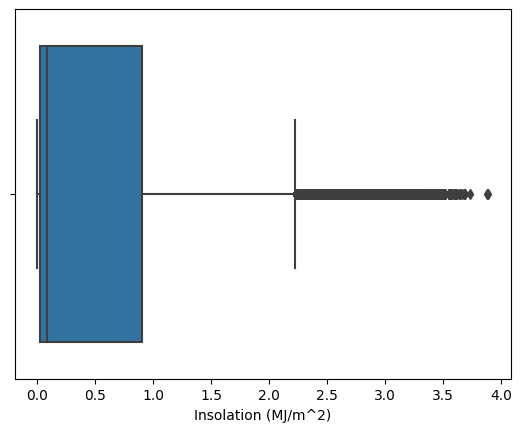

In [14]:
# Check for outliers in 'pressure' column

sns.boxplot(x=df_final['Insolation (MJ/m^2)'])
plt.show()

In [15]:
df_final['Insolation (MJ/m^2)'].fillna(0)

datetime
2021-01-01 00:00:00    0.00
2021-01-01 01:00:00    0.00
2021-01-01 02:00:00    0.00
2021-01-01 03:00:00    0.00
2021-01-01 04:00:00    0.00
                       ... 
2019-12-31 19:00:00    0.01
2019-12-31 20:00:00    0.01
2019-12-31 21:00:00    0.01
2019-12-31 22:00:00    0.01
2019-12-31 23:00:00    0.01
Name: Insolation (MJ/m^2), Length: 43807, dtype: float64

In [16]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax
    # Zoom into the plot of the hourly (actual) total load


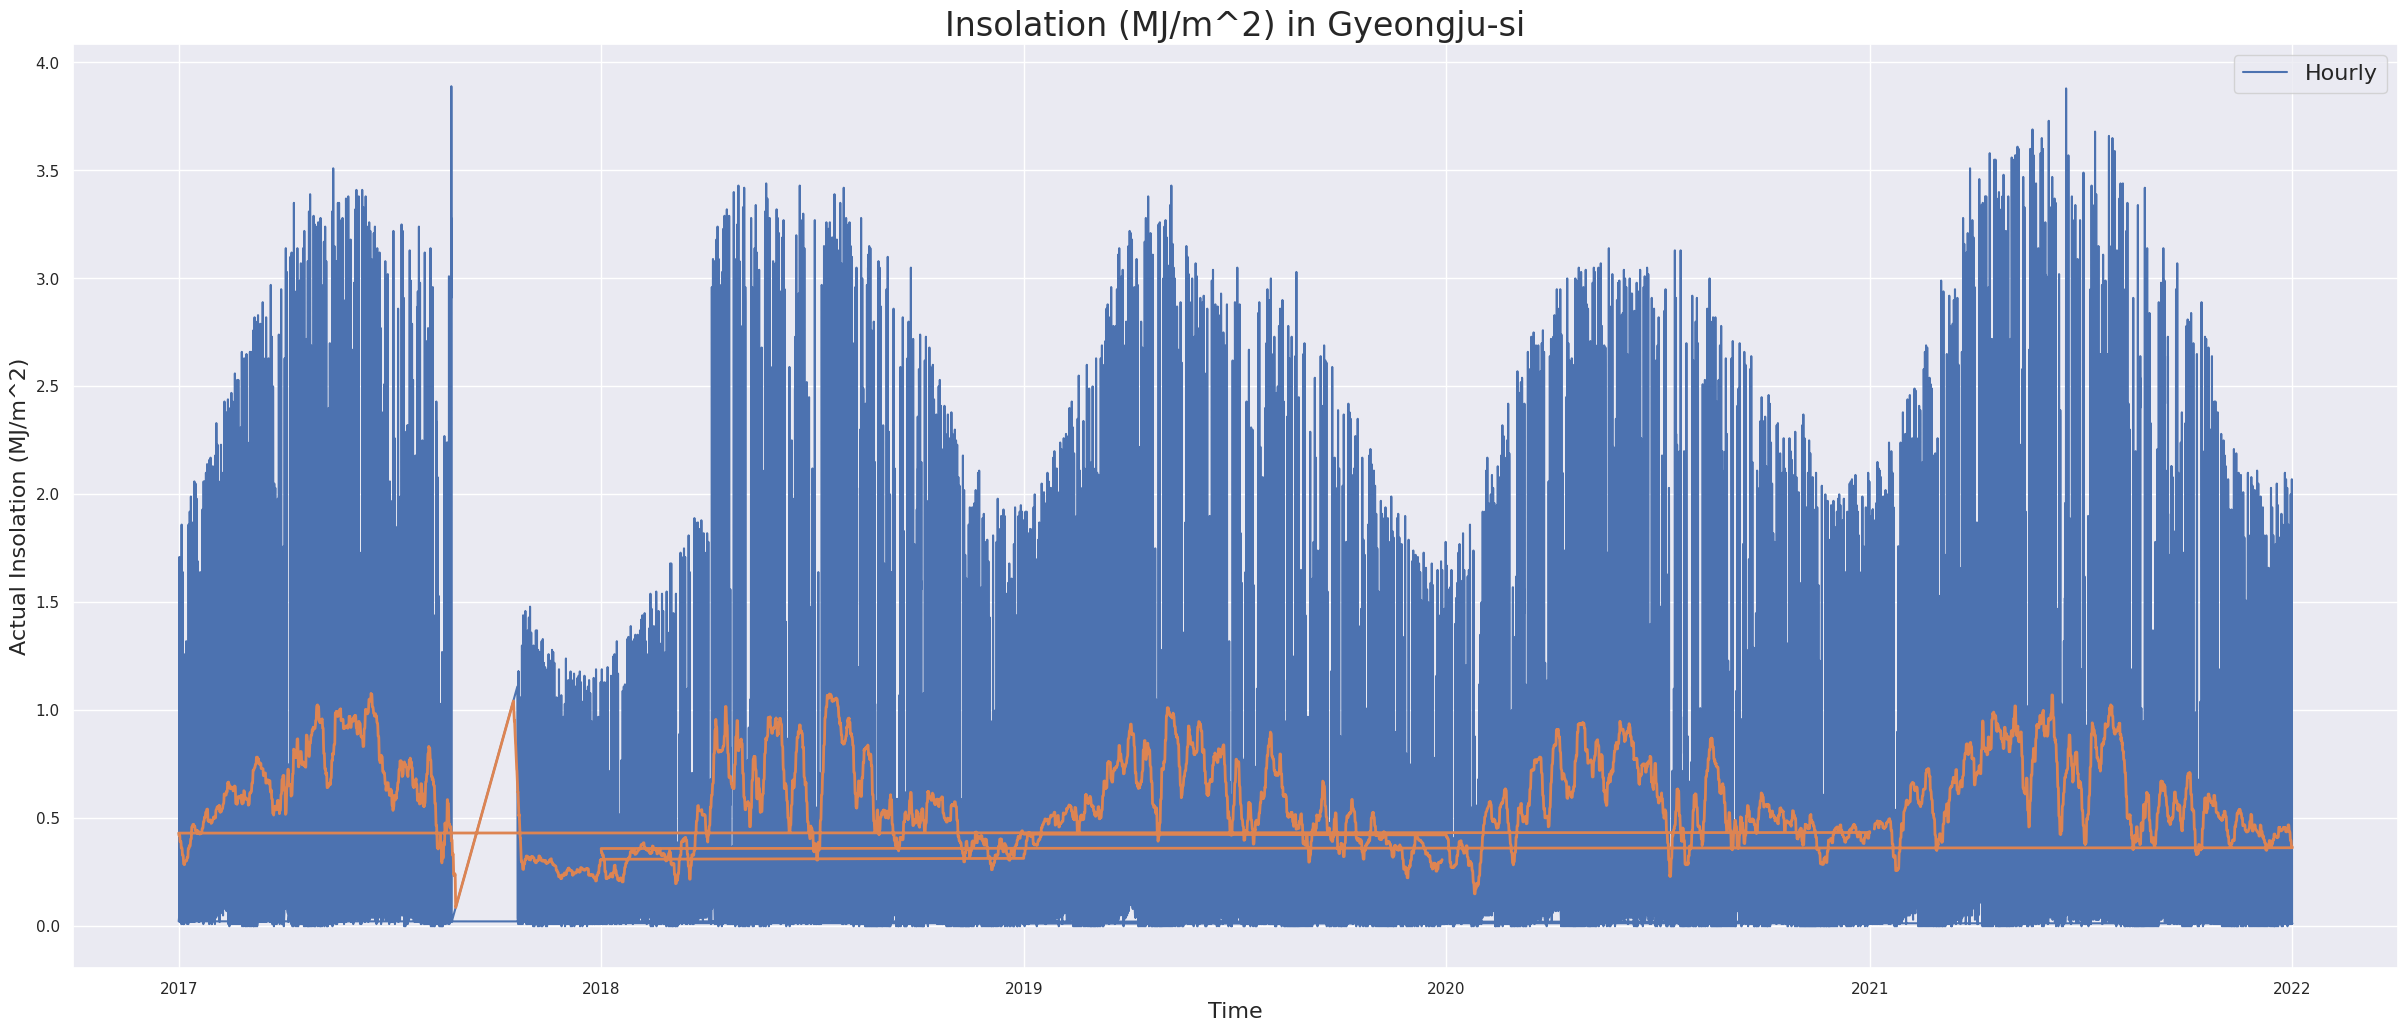

In [17]:
# Plot the 'Temperature' for Bilbao
rolling2 = df_final['Insolation (MJ/m^2)'].rolling(24*7, center=True).mean()

ax = plot_series(df_final, 'Insolation (MJ/m^2)', 
                 label='Hourly', ylabel='Actual Insolation (MJ/m^2)',
                 title='Insolation (MJ/m^2) in Gyeongju-si')
ax.plot(rolling2, linestyle='-', linewidth=2, label='Weekly rolling mean')

plt.show()

## <a id='ref14'>2.3. Autocorrelation, partial autocorrelation and cross-correlation</a> 

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43807 entries, 2021-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature (°C)           43807 non-null  float64
 1   °­¼ö·®(mm)                 43657 non-null  float64
 2   Wind Speed (m/s)           43807 non-null  float64
 3   Ç³Çâ(16¹æÀ§)               43807 non-null  float64
 4   Humidity (%)               43807 non-null  float64
 5   Áõ±â¾Ð(hPa)                43807 non-null  float64
 6   ÀÌ½½Á¡¿Âµµ(¡ÆC)            43807 non-null  float64
 7   Barometric Pressure (hPa)  43807 non-null  float64
 8   Sea Level Pressure (hPa)   43807 non-null  float64
 9   Sunlight (hr)              43799 non-null  float64
 10  Insolation (MJ/m^2)        43799 non-null  float64
 11  Àû¼³(cm)                   42683 non-null  float64
 12  3½Ã°£½ÅÀû¼³(cm)            0 non-null      float64
 13  Àü¿î·®(10ºÐ

## <a id='ref17'>Feature selection</a> 

In [19]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [20]:
train_end_idx = int(len(df_final)*0.70)
cv_end_idx = int(len(df_final)*0.85)
test_end_idx = len(df_final)

In [21]:
# Wind Direction (deg)            0.086512
# h_max                           0.035325
# Barometric Pressure (hPa)      -0.010425
# Sea Level Pressure (hPa)       -0.016479
# Precipitation (mm)             -0.092167
# Humidity (%)                   -0.548498
X = df_final['Insolation (MJ/m^2)'].fillna(0).values
y = df_final['Insolation (MJ/m^2)'].fillna(0).values
X = X.reshape(-1,1)
y = y.reshape(-1, 1)

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [23]:
X.shape

(43807, 1)

In [24]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

StandardScaler()

In [25]:
X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

In [26]:

past_history = 24*7
future_target = 24

In [27]:
X_train, y_train = multivariate_data(X_norm, y_norm,
                                     0, train_end_idx, past_history, 
                                     future_target, step=1, single_step=False)

In [28]:
print(y_train.shape)
print(X_train.shape)

(30496, 24, 1)
(30496, 168, 1)


In [29]:
X_val, y_val = multivariate_data(X_norm, y_norm,
                                 train_end_idx, cv_end_idx, past_history, 
                                 future_target, step=1, single_step=False)

In [30]:
print(X_val.shape)
print(y_val.shape)

(6403, 168, 1)
(6403, 24, 1)


In [31]:
X_test, y_test = multivariate_data(X_norm, y_norm,
                                   cv_end_idx, test_end_idx-past_history, past_history, 
                                   future_target, step=1, single_step=False)

In [32]:
print(X_test.shape)
print(y_test.shape)

(6236, 168, 1)
(6236, 24, 1)


In [33]:
batch_size = 512
buffer_size = 1000

In [34]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation = validation.batch(batch_size).prefetch(1)

In [35]:
# Define some common parameters

input_shape = X_train.shape[-2:]
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [36]:
y_test.shape

(6236, 24, 1)

In [37]:
#y_test = y_test.reshape(-1, 1)
y_test = y_test.reshape(-1, future_target)
y_test_inv = scaler_y.inverse_transform(y_test)

In [38]:
def plot_model_rmse_and_loss(history):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

## Stacked LSTM

In [39]:
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector

multivariate_stacked_lstm = tf.keras.models.Sequential([
    LSTM(250, input_shape=input_shape, 
         return_sequences=True),
    LSTM(150, return_sequences=True),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(future_target)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'insolation_stacked_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=3e-3, amsgrad=True)

multivariate_stacked_lstm.compile(loss=loss,
                                  optimizer=optimizer,
                                  metrics=metric)

In [40]:
history = multivariate_stacked_lstm.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping, 
                                           model_checkpoint])

Epoch 1/120
60/60 [==============================] - 310s 5s/step - loss: 0.4784 - root_mean_squared_error: 0.6917 - val_loss: 0.2700 - val_root_mean_squared_error: 0.5196
Epoch 2/120
60/60 [==============================] - 304s 5s/step - loss: 0.2902 - root_mean_squared_error: 0.5387 - val_loss: 0.2390 - val_root_mean_squared_error: 0.4889
Epoch 3/120
60/60 [==============================] - 303s 5s/step - loss: 0.2709 - root_mean_squared_error: 0.5205 - val_loss: 0.2209 - val_root_mean_squared_error: 0.4700
Epoch 4/120
60/60 [==============================] - 302s 5s/step - loss: 0.2616 - root_mean_squared_error: 0.5115 - val_loss: 0.2211 - val_root_mean_squared_error: 0.4702
Epoch 5/120
60/60 [==============================] - 304s 5s/step - loss: 0.2554 - root_mean_squared_error: 0.5054 - val_loss: 0.2156 - val_root_mean_squared_error: 0.4643
Epoch 6/120
60/60 [==============================] - 302s 5s/step - loss: 0.2496 - root_mean_squared_error: 0.4996 - val_loss: 0.1962 - val_

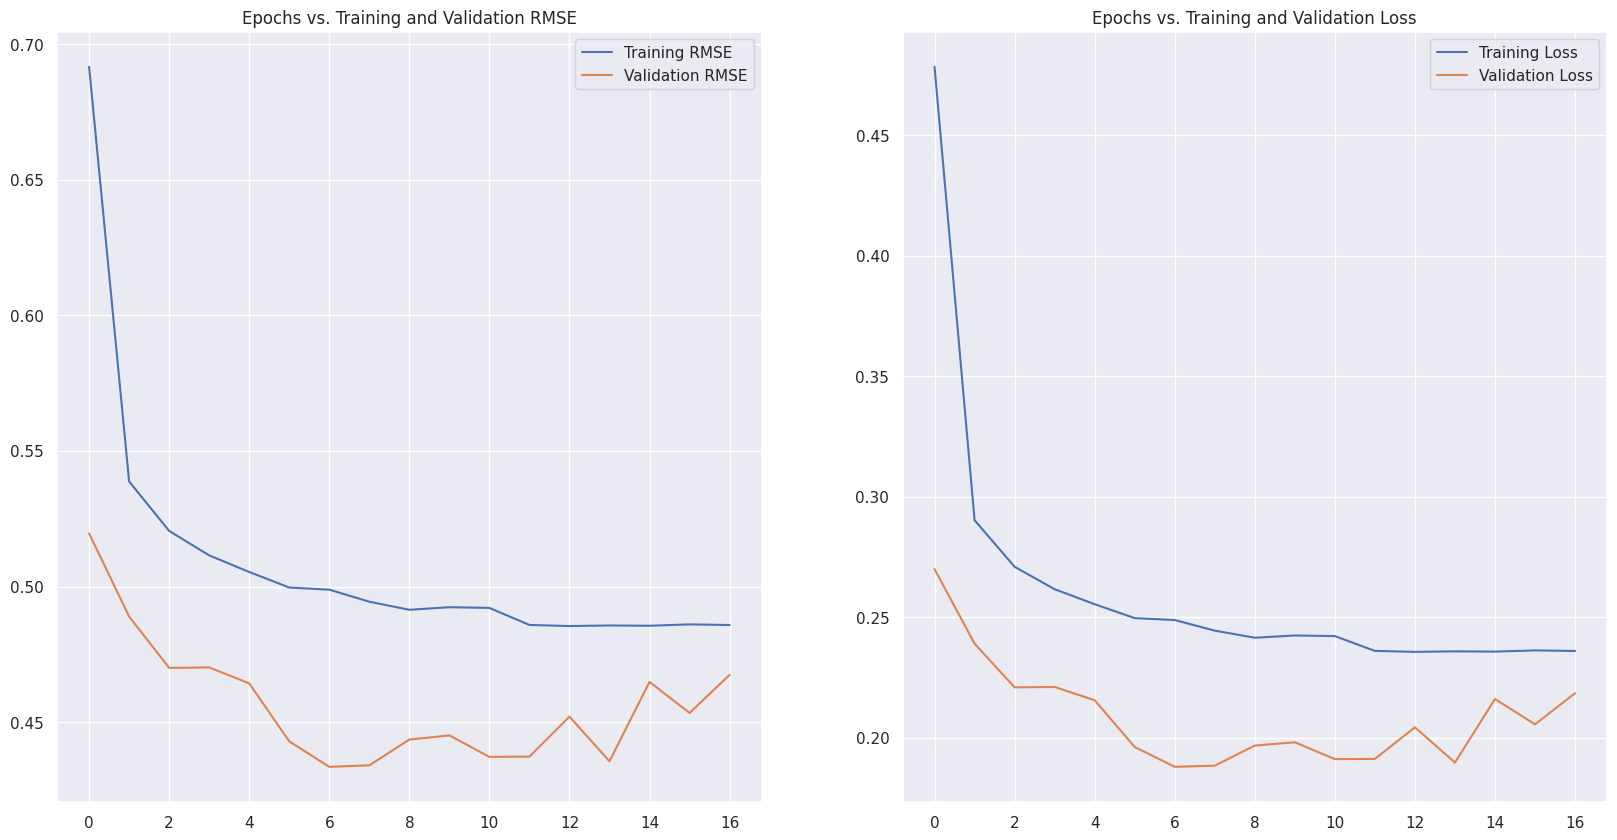

In [41]:
plot_model_rmse_and_loss(history)

In [42]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
multivariate_stacked_lstm = tf.keras.models.load_model('insolation_stacked_lstm.h5')

forecast = multivariate_stacked_lstm.predict(X_test)
multivariate_stacked_lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_mult_stacked_lstm = sqrt(mean_squared_error(y_test_inv, 
                                                 multivariate_stacked_lstm_forecast))
print('RMSE of hour-ahead power generation multivariate Stacked LSTM forecast: {}'
      .format(round(rmse_mult_stacked_lstm, 3)))


195/195 [==============================] - 49s 246ms/step
RMSE of hour-ahead power generation multivariate Stacked LSTM forecast: 0.434


In [43]:
multivariate_stacked_lstm_forecast[0]

array([-7.35019753e-03,  1.75053789e-03,  1.35736302e-01,  3.97601008e-01,
        8.87022614e-01,  1.51812422e+00,  2.11049175e+00,  2.57120371e+00,
        2.86726856e+00,  2.85945249e+00,  2.60184622e+00,  2.12514019e+00,
        1.63299680e+00,  1.11568940e+00,  6.63235843e-01,  3.50766450e-01,
        1.18567415e-01,  8.32012370e-02, -1.38387587e-02,  6.89841202e-03,
        7.70475939e-02,  1.26603469e-01,  5.65991476e-02,  4.64590862e-02],
      dtype=float32)

In [45]:
y_test_inv[0]

array([0.1375, 0.145 , 0.1525, 0.16  , 0.55  , 1.12  , 1.92  , 2.61  ,
       2.97  , 2.62  , 1.45  , 0.68  , 0.27  , 0.12  , 0.08  , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [46]:
import joblib
scaler_filename = "scaler_icrs.save"
joblib.dump(scaler_X, scaler_filename)

['scaler_icrs.save']